# Step 1: Load CSV

In [41]:
import pandas as pd

df = pd.read_csv('Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data understanding and manipulation

In [39]:
# Display the information of the df
print(df.info())
print("-" * 100)

# Display the summary statistics of the df
print(df.describe())
print("-" * 100)

# Display the number of missing values in the df
print(df.isnull().sum())
print("-" * 100)

# Display the data types of the variables in the df
print(df.dtypes)
print("-" * 100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

In [3]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

# Data preprocessing

In [15]:
# Convert the gender column to numeric
df["gender"] = df["gender"].map({"Male" : 1, "Female" : 0})

In [16]:
# Convert the Partner column to numeric
df["Partner"] = df["Partner"].map({"Yes" : 1, "No" : 0})

In [17]:
# Convert the Dependents column to numeric
df["Dependents"] = df["Dependents"].map({"Yes" : 1, "No" : 0})

In [18]:
# Convert the PhoneService column to numeric
df["PhoneService"] = df["PhoneService"].map({"Yes" : 1, "No" : 0})

In [19]:
# Convert the MultipleLines column to numeric
df["MultipleLines"] = df["MultipleLines"].map({"Yes" : 1, "No" : 0, "No phone service" : 0})

In [21]:
# Use the get_dummies method to convert the InternetService column to numeric
df = pd.get_dummies(df, columns = ["InternetService"], drop_first = True)

In [23]:
# Convert the OnlineSecurity column to numeric
df["OnlineSecurity"] = df["OnlineSecurity"].map({"Yes" : 1, "No" : 0, "No internet service" : 0})

# Convert the OnlineBackup column to numeric
df["OnlineBackup"] = df["OnlineBackup"].map({"Yes" : 1, "No" : 0, "No internet service" : 0})

# Convert the DeviceProtection column to numeric
df["DeviceProtection"] = df["DeviceProtection"].map({"Yes" : 1, "No" : 0, "No internet service" : 0})

# Convert the TechSupport column to numeric
df["TechSupport"] = df["TechSupport"].map({"Yes" : 1, "No" : 0, "No internet service" : 0})

# Convert the StreamingTV column to numeric
df["StreamingTV"] = df["StreamingTV"].map({"Yes" : 1, "No" : 0, "No internet service" : 0})

# Convert the StreamingMovies column to numeric
df["StreamingMovies"] = df["StreamingMovies"].map({"Yes" : 1, "No" : 0, "No internet service" : 0})



In [25]:
# Convert the Contract column to numeric
df["Contract"] = df["Contract"].map({"Month-to-month" : 0, "One year" : 1, "Two year" : 2})

In [26]:
# Convert the PaperlessBilling column to numeric
df["PaperlessBilling"] = df["PaperlessBilling"].map({"Yes" : 1, "No" : 0})

# Use the get_dummies method to convert the PaymentMethod column to numeric
df = pd.get_dummies(df, columns = ["PaymentMethod"], drop_first = True)

# Convert the total charges column to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = "coerce")

In [27]:
# Convert the Churn column to numeric
df["Churn"] = df["Churn"].map({"Yes" : 1, "No" : 0})

In [29]:
# Drop the customerID column
df = df.drop("customerID", axis = 1)

## Check for outliers

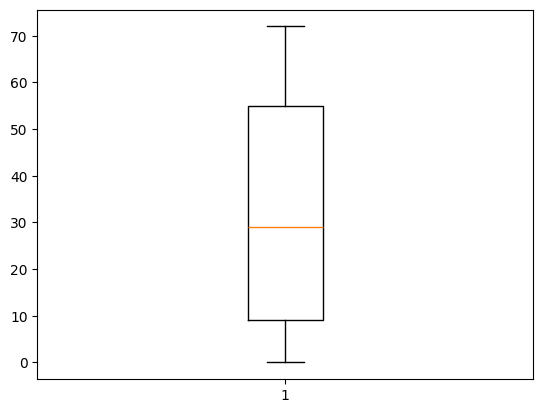

In [36]:
import matplotlib.pyplot as plt

# Create box plots for the numeric columns
plt.boxplot(df["tenure"])
plt.show()

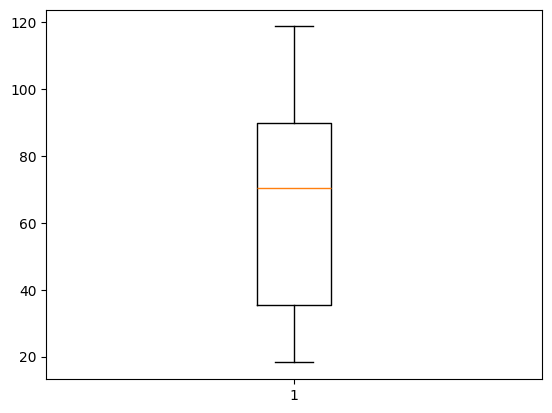

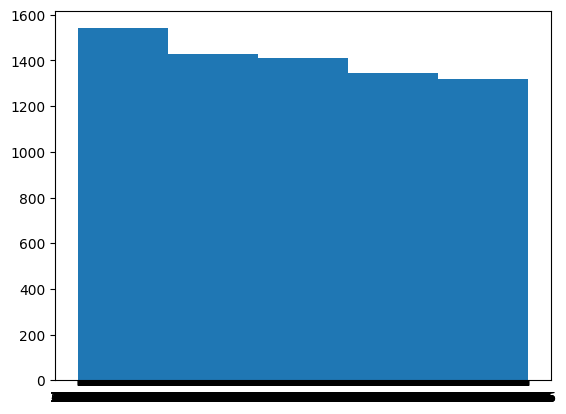

In [47]:
plt.boxplot(df["MonthlyCharges"])
plt.show()

plt.hist(df["TotalCharges"], bins = 5)
plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre